In [1]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from scipy import signal
from sklearn.preprocessing import normalize

In [2]:
rootgrp = Dataset("../data/ERA5/download_ 1979.nc", "r+", format="NETCDF4")

In [22]:
len(rootgrp.dimensions['time'])
print(rootgrp.__dict__)

OrderedDict([('Conventions', 'CF-1.6'), ('history', '2020-06-03 14:42:49 GMT by grib_to_netcdf-2.16.0: /opt/ecmwf/eccodes/bin/grib_to_netcdf -S param -o /cache/data6/adaptor.mars.internal-1591192570.863806-4146-7-265ec668-9f65-4155-b1f9-bc60dcbbd01a.nc /cache/tmp/265ec668-9f65-4155-b1f9-bc60dcbbd01a-adaptor.mars.internal-1591192570.8643196-4146-2-tmp.grib')])


/home/wang/.virtualenv/weather/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  


In [11]:
for dimobj in rootgrp.dimensions.values():
    print(dimobj)

<class 'netCDF4._netCDF4.Dimension'>: name = 'longitude', size = 17
<class 'netCDF4._netCDF4.Dimension'>: name = 'latitude', size = 13
<class 'netCDF4._netCDF4.Dimension'>: name = 'time', size = 8496


/home/wang/.virtualenv/weather/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  


In [23]:
test = Dataset("../data/ERA5/download_ 1979.nc", "r+", format="NETCDF4")
time_num = test.variables['t'][:][0]
time_num_last = test.variables['t'][:][-1]
print(test.variables['t'][:].shape)
print(time_num[0])
print(time_num_last[0])
from datetime import datetime, timedelta
from netCDF4 import num2date, date2num
dates = num2date(time_num,units=time_num.units,calendar=time_num.calendar)
print("dates corresponding to time values:\n{}".format(dates))

(8496, 13, 17)
[233.07166158 233.16730291 233.31938831 233.51380675 233.73540197
 233.99462657 234.31186312 234.67038746 235.00539343 235.26879907
 235.4663533  235.63516286 235.78463511 235.89595535 235.95658046
 235.9780083  235.98271197]
[243.38158816 243.15372138 242.93421668 242.72986826 242.55321924
 242.42151642 242.35043871 242.33632769 242.35409712 242.36977603
 242.37657022 242.38231915 242.38231915 242.35043871 242.26629524
 242.12779823 241.93337979]


AttributeError: 'MaskedArray' object has no attribute 'units'

In [5]:
rootgrp.variables['t'][:][0][0]

masked_array(data=[232.44189215, 232.4946778 , 232.59711333, 232.75181187,
                   232.95668293, 233.21956593, 233.55352665, 233.9381825 ,
                   234.30611418, 234.60140026, 234.8318802 , 235.04145492,
                   235.24005441, 235.39423033, 235.48725851, 235.54056679,
                   235.58655825],
             mask=False,
       fill_value=1e+20)

So we got a (13 x 17 x 7) matrix in each element

In [6]:
r = rootgrp.variables['r'][:][0]
a = normalize(rootgrp.variables['r'][:][0])

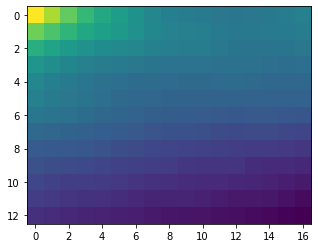

In [7]:
imgplot = plt.imshow((rootgrp.variables['r'][:][0]))

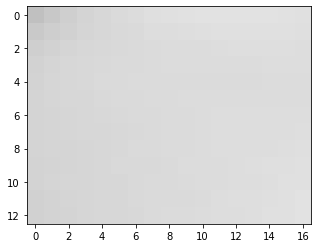

In [8]:
imgplot = plt.imshow(normalize(r), cmap=plt.get_cmap('Greys'), interpolation='nearest',
                  vmin=0, vmax=1)
# print(r)

In [3]:
scharr=np.array([[1,2,1],
                [2,4,2],
                [1,2,1]])

In [4]:
def Two_layer_conv2d(old_arr):
    mid=signal.convolve2d(old_arr,scharr,boundary='fill',mode='valid')
    new_arr=signal.convolve2d(mid,scharr,boundary='fill',mode='valid')
    return new_arr

## test_PCA

In [5]:
print((rootgrp.variables['z'][:].shape))
data = np.ndarray(shape=(8496,7,13,17), dtype=float)
j = 0
for i in list(rootgrp.variables.keys())[3:]:
    data[:,j,:,:] = rootgrp.variables[i][:]
    j+=1

(8496, 13, 17)


In [19]:
new_data = np.ndarray(shape=(8496,7,9,13), dtype=float)
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        new_data[i][j] = Two_layer_conv2d(data[i][j])

[[13048259.91649675 13041172.17360242 13034080.42385074 13026890.69997416
  13019619.93417629 13012385.10084113 13005254.57505057 12998206.25446245
  12991251.38412803 12984494.01308501 12978010.53012998 12971741.60792344
  12965576.99326151]
 [13050730.85494796 13043655.39113262 13036619.47887693 13029575.55290655
  13022554.8925595  13015629.10425425 13008799.6097789  13002022.20444912
  12995334.37176916 12988856.83447342 12982649.69542218 12976649.62041858
  12970779.57439871]
 [13055433.35443701 13048371.33298181 13041370.0606542  13034456.80993486
  13027623.17934869 13020855.2095217  13014145.79151344 13007514.18408986
  13001025.14323592 12994752.98969281 12988723.18639273 12982914.4065143
  12977309.20084001]
 [13061540.19280101 13054566.451461   13047662.1192306  13040933.57170982
  13034325.4884165  13027736.40538224 13021157.79187847 13014667.19998298
  13008343.73281507 13002225.6493998  12996333.24253084 12990693.91394233
  12985326.53463987]
 [13068741.54948926 13061914.

In [22]:
print(new_data[0][0].shape)

(9, 13)


In [6]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 

In [7]:
pca=PCA(n_components= 30)
data = None
first_time = True
for i in range(1979, 2019):
    ds = Dataset('../data/ERA5/download_ ' + str(i) + '.nc', "r+", format="NETCDF4")
    sec = np.ndarray(shape=(ds.variables['t'].shape[0],7,9,13), dtype=float)
    k=0
    for j in list(ds.variables.keys())[3:]:
        if ds.variables[j][:].mask == False:
            for index,a in enumerate(ds.variables[j][:]):
                sec[index, k, :, :] = Two_layer_conv2d(a)
            k+=1
    input_X = np.reshape(sec, (sec.shape[0], -1))
    pca.fit(input_X)
    print("Epoch " + str(i-1978))

Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29
Epoch 30
Epoch 31
Epoch 32
Epoch 33
Epoch 34
Epoch 35
Epoch 36
Epoch 37
Epoch 38
Epoch 39
Epoch 40


In [8]:
from sklearn.model_selection import train_test_split

# Split the `digits` data into training and test sets
X_train, X_test = train_test_split(tran_X, test_size=0.2, random_state=42)

NameError: name 'tran_X' is not defined

In [77]:
kmeans = KMeans(n_clusters=12, random_state= 100, max_iter=50000 ).fit(X_train)
print(kmeans.n_iter_)

30


In [78]:
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, adjusted_mutual_info_score, silhouette_score
print('% 9s' % 'inertia    homo   compl  v-meas     ARI AMI  silhouette')
print('%i   %.3f   %.3f   %.3f   %.3f   %.3f    %.3f'
          %(kmeans.n_iter_,
      homogeneity_score(y_test, y_pred),
      completeness_score(y_test, y_pred),
      v_measure_score(y_test, y_pred),
      adjusted_rand_score(y_test, y_pred),
      adjusted_mutual_info_score(y_test, y_pred),
      silhouette_score(X_test, y_pred, metric='euclidean')))

inertia    homo   compl  v-meas     ARI AMI  silhouette


NameError: name 'clf' is not defined

In [37]:
unique, counts = np.unique(kmeans.labels_, return_counts=True)
print(dict(zip(unique, counts)))

{0: 1200, 1: 744, 2: 1071, 3: 990, 4: 596, 5: 825, 6: 724, 7: 223, 8: 1069, 9: 1054}


## 利用Feature map 去做

In [162]:
from scipy import spatial
result = 1 - spatial.distance.cosine(data[0], data[1])
print(result)

0.9999999210682348


In [168]:
from sklearn.metrics.pairwise import cosine_distances
cos_dis = cosine_distances(data)
print(cos_dis.shape)


(8496, 8496)
[[3.39486891e-07]]


In [172]:
cos_dis[1][1]

0.0

## 利用一層conv2d 去做